# Homework No. 7

The following jupyter notebook contains the results of the seventh homework for the course: "Data Visualization" and was created by Franz Just.

To execute the jupyter notebook, the following libraries are required to install:
- pandas
- seaborn
- matplotlib
- numpy
- sklearn

The dataset that is used was published by **Jack Daoud** on **Kaggle** and can be found through the following **URL:** https://www.kaggle.com/jackdaoud/marketing-data.

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("dataset.csv", index_col = None)
df = df.rename(columns={" Income ": "Income"})
df["Income"] = df["Income"].replace("[$,]", "", regex=True).astype(float)
df = df.dropna()
df2 = df[["Income", "Kidhome", "Teenhome", "Year_Birth", "Recency", "NumDealsPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebPurchases", "NumWebVisitsMonth"]]

In order to do a prinipal component analysis, a sub-dataset was created with the following columns:

- Income
- Kidhome
- Teenhome
- Year_Birth
- Recency
- NumDealsPurchases
- NumCatalogPurchases
- NumStorePurchases
- NumWebPurchases
- NumWebVisitsMonth

## Data processing

Before the actual analysis, the data needs to be normalized.

In [3]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df2)

## Principal Component Analysis (PCA)

In [4]:
from sklearn.decomposition import PCA

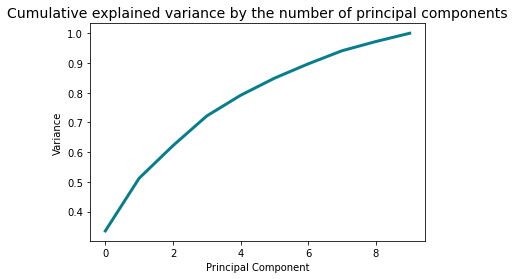

In [5]:
pca = PCA().fit(df_scaled)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by the number of principal components', size=14)
plt.ylabel('Variance')
plt.xlabel('Principal Component')
plt.show()

In the diagram above, we can see on the x-axis the principal components and on the y-axis the variance they explain. By that it get's clear that the first component already explains more then 50% of the variance in the dataset. It can be observed that by increasing the amount of principal components, the the rate of variance per component shrinks. 

### Feature Importance

In [6]:
ldg = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(df2.columns) + 1)],
    index=df2.columns
)
ldg.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Income,0.795685,-0.040649,-0.033809,0.003322,0.305546,0.011536,0.374686,0.198427,0.301877,0.012086
Kidhome,-0.746741,0.056334,-0.168156,0.075743,0.409806,0.207862,0.337337,-0.139021,-0.209217,-0.132668
Teenhome,0.023383,0.761167,0.366625,-0.053867,0.160202,-0.451477,0.022226,0.150370,-0.120314,-0.127029
Year_Birth,-0.288168,-0.414397,-0.710367,0.113962,0.087192,-0.445869,-0.043009,0.138994,-0.022489,0.000995
Recency,0.009167,0.009538,0.173501,0.982881,-0.057914,-0.016983,0.012152,-0.000680,0.016956,0.006396
NumDealsPurchases,-0.111128,0.776647,-0.358064,0.079573,0.315790,0.133687,-0.265024,-0.065726,0.120139,0.209268
NumCatalogPurchases,0.796776,-0.080977,-0.163625,0.069483,0.172792,0.256892,-0.283753,0.244545,-0.160601,-0.255890
NumStorePurchases,0.782538,0.141015,-0.222461,0.024684,-0.043051,-0.157555,0.009119,-0.499389,0.059928,-0.195861
NumWebPurchases,0.577294,0.462698,-0.370724,0.028385,-0.384801,0.079045,0.273224,0.096797,-0.237645,0.141547
NumWebVisitsMonth,-0.694085,0.417133,-0.237934,0.004633,-0.342984,0.120879,0.039598,0.133118,0.242973,-0.278368


In the table above, the importance of the data attributes can be analysed. That means, the correlation between the principal components as well as the data attributes was computed. 

The following diagram hereby visualizes the features importance for the first principal component. 

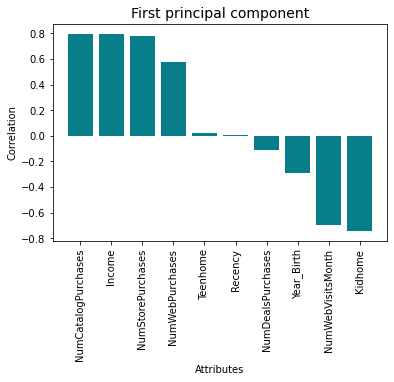

In [7]:
pcldg = ldg.sort_values(by='PC1', ascending=False)[['PC1']]
pcldg = pcldg.reset_index()
pcldg.columns = ['Attribute', 'Correlation']

plt.bar(x=pcldg['Attribute'], height=pcldg['Correlation'], color='#087E8B')
plt.title('First principal component', size=14)
plt.xticks(rotation='vertical')
plt.ylabel('Correlation')
plt.xlabel('Attributes')
plt.show()

Because of the fact that a dataset with 10 different features is hard to visualize, we can take the first 2 principal components and visualize them in a 2D scatter plot. By that, around 60% of the variance in the dataset is explained. 

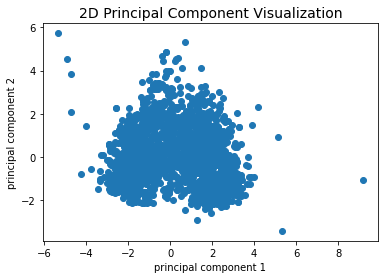

In [8]:
pca = PCA().fit_transform(df_scaled)

plt.scatter(pca[:, 0], pca[:, 1])
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.title('2D Principal Component Visualization', size=14);

To further visualize the importance of the single features for the PCA 1 as well as PCA 2, the next graph represents the feature axis. 

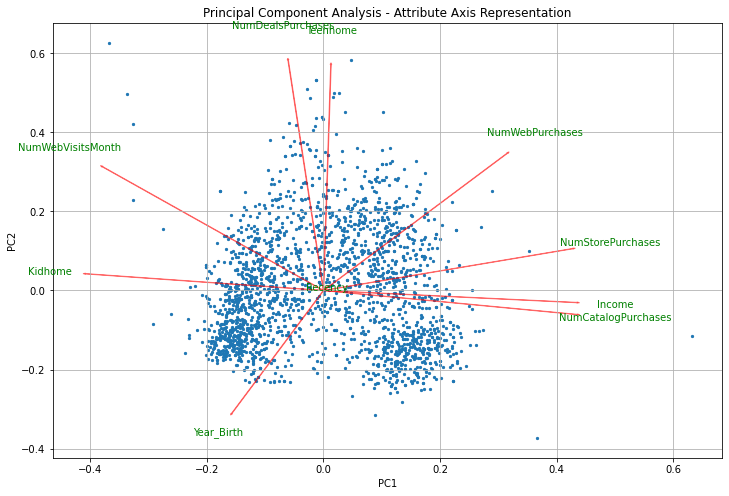

In [9]:
from sklearn.decomposition import PCA
pcamodel = PCA(n_components=5)
pca = pcamodel.fit_transform(df_scaled)
plt.figure(figsize = (12,8))
plt.title("Principal Component Analysis - Attribute Axis Representation");

def axis_representation(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

axis_representation(pca[:,0:2],np.transpose(pcamodel.components_[0:2, :]),list(ldg.index))
plt.show()

## Source

[1] Jack Daoud; Marketing Analytics; https://www.kaggle.com/jackdaoud/marketing-data

-----------------------------------------------------------
Author: Franz Just